### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### Load the dataset


In [8]:
file_path = 'Telco-Customer-Churn.csv'  # Replace with your dataset path
data = pd.read_csv("Telco-Customer-Churn.csv")


### Preview the data

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning

In [16]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [18]:
# Check for missing values
data['TotalCharges'].fillna(0, inplace=True)
data.isnull().sum()

C:\Users\Lipi Chandrakar\AppData\Local\Temp\ipykernel_4604\3092548411.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Encode

In [21]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col != 'customerID':  
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

### Split the Data

In [24]:
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scaling

In [27]:
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Training

In [30]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [32]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))
print(classification_report(y_test, logistic_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Logistic Regression Accuracy: 0.7998580553584103
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Random Forest Accuracy: 0.794180269694819
              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [34]:
logistic_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42), logistic_params, cv=5)
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']})

In [36]:
print("Best Logistic Regression Parameters:", logistic_grid.best_params_)

Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}


In [40]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [43]:
print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 100}


### Visualize

C:\Users\Lipi Chandrakar\AppData\Local\Temp\ipykernel_4604\689528551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='pastel')


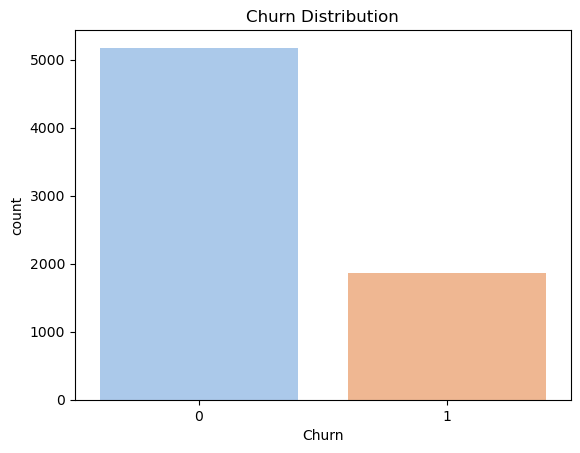

In [56]:
sns.countplot(data=data, x='Churn', palette='pastel')
plt.title('Churn Distribution')
plt.show()

C:\Users\Lipi Chandrakar\AppData\Local\Temp\ipykernel_4604\2170596558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='coolwarm')


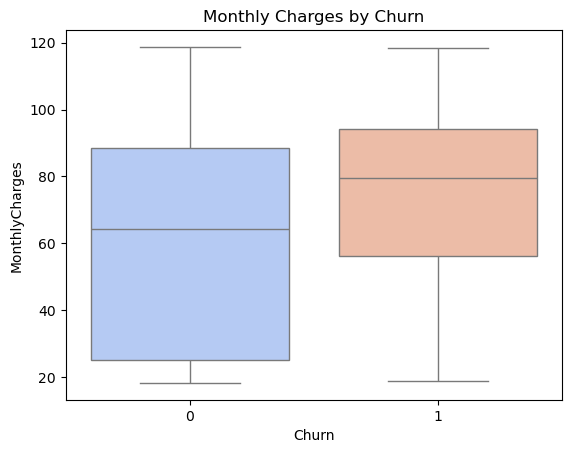

In [58]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges by Churn')
plt.show()

### Result

In [60]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_preds})
results.to_csv('churn_predictions.csv', index=False)